TESTED, DOES RUN

In [1]:
import music21
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import mnet
from scipy import stats

## Load Data

In [2]:
'''
Creat local corpus with access pieces
'''

localCorpus = music21.corpus.corpora.LocalCorpus()
localCorpus.addPath('../library')
music21.corpus.cacheMetadata()


/opt/anaconda3/envs/music-network-env/lib/python3.7/site-packages/music21/corpus/corpora.py: WARNING: local metadata cache: starting processing of paths: 1
/opt/anaconda3/envs/music-network-env/lib/python3.7/site-packages/music21/corpus/corpora.py: WARNING: cache: filename: /var/folders/j6/2q7hftds7vb8_lsfy50l8lzw0000gn/T/music21/local.p.gz
bundles.py: WARNING: MetadataBundle Modification Time: 1589089705.1579494
bundles.py: WARNING: Skipped 1 sources already in cache.
/opt/anaconda3/envs/music-network-env/lib/python3.7/site-packages/music21/corpus/corpora.py: WARNING: cache: writing time: 0.012 md items: 6

/opt/anaconda3/envs/music-network-env/lib/python3.7/site-packages/music21/corpus/corpora.py: WARNING: cache: filename: /var/folders/j6/2q7hftds7vb8_lsfy50l8lzw0000gn/T/music21/local.p.gz
caching.py: WARNING: cache: final writing time: 0.013 seconds


## Grouped

In [3]:

s = music21.corpus.parse('telemannfantasie1.xml')
flute = s[5]
flute_notes =flute.recurse().notes
grouping = [1, 5, 11, 27, 37, 49, 61, 75, "end"]


nodelst_group, transition_edges=mnet.convert_grouping(flute_notes, grouping)
g_group=mnet.create_graph(nodelst_group)

In [10]:
def change_weight_analysis(g_group, datapoints=10):
    transition_err =[]
    transition_means = []
    for transition in transition_edges:


        i=0
        errlist=np.zeros(datapoints)
        meanlist=np.zeros(datapoints)
        while i < datapoints:
            print(i)
            g = g_group.copy()
            g = mnet.degree_increase(g, [transition], i)
            l = mnet.get_Lengths(g, 500)

            errlist[i] = 2*(stats.sem(l))
            meanlist[i] = (np.mean(l))
            i += 1
        transition_err.append(errlist)
        transition_means.append(meanlist)
        print(meanlist)
        print(errlist)
    return transition_err, transition_means


In [11]:
transition_vars2, transition_means2 = change_weight_analysis(g_group)

0
1
2
3
4
5
6
7
8
9
[702.402 669.642 654.3   671.566 632.812 651.556 642.412 649.776 643.64
 617.742]
[24.08649617 23.63433287 23.35045437 24.49062274 24.91601551 25.13646392
 21.94484145 23.44356047 24.11811722 22.36768558]
0
1
2
3
4
5
6
7
8
9
[674.032 667.014 642.636 632.622 622.536 620.004 656.272 652.938 660.364
 641.52 ]
[23.0366913  22.56225692 24.35483969 23.18491029 23.15200978 22.23627612
 22.95582898 23.42740977 23.11887612 25.33613602]
0
1
2
3
4
5
6
7
8
9
[710.524 605.688 590.212 552.568 561.568 546.402 547.236 528.462 535.396
 545.23 ]
[25.72392061 20.59743406 19.91788736 19.17013655 17.93260627 18.36058172
 18.82463237 17.68792225 18.16790784 18.58317749]
0
1
2
3
4
5
6
7
8
9
[676.904 628.442 607.92  602.344 590.874 621.64  599.972 608.998 599.716
 589.788]
[22.04684515 21.71220516 18.62823629 20.68212121 20.38899033 21.05629184
 21.31135259 21.05735311 20.77016269 20.82022507]
0
1
2
3
4
5
6
7
8
9
[684.07  669.406 645.338 633.542 659.6   639.948 632.034 634.898 625.846
 634

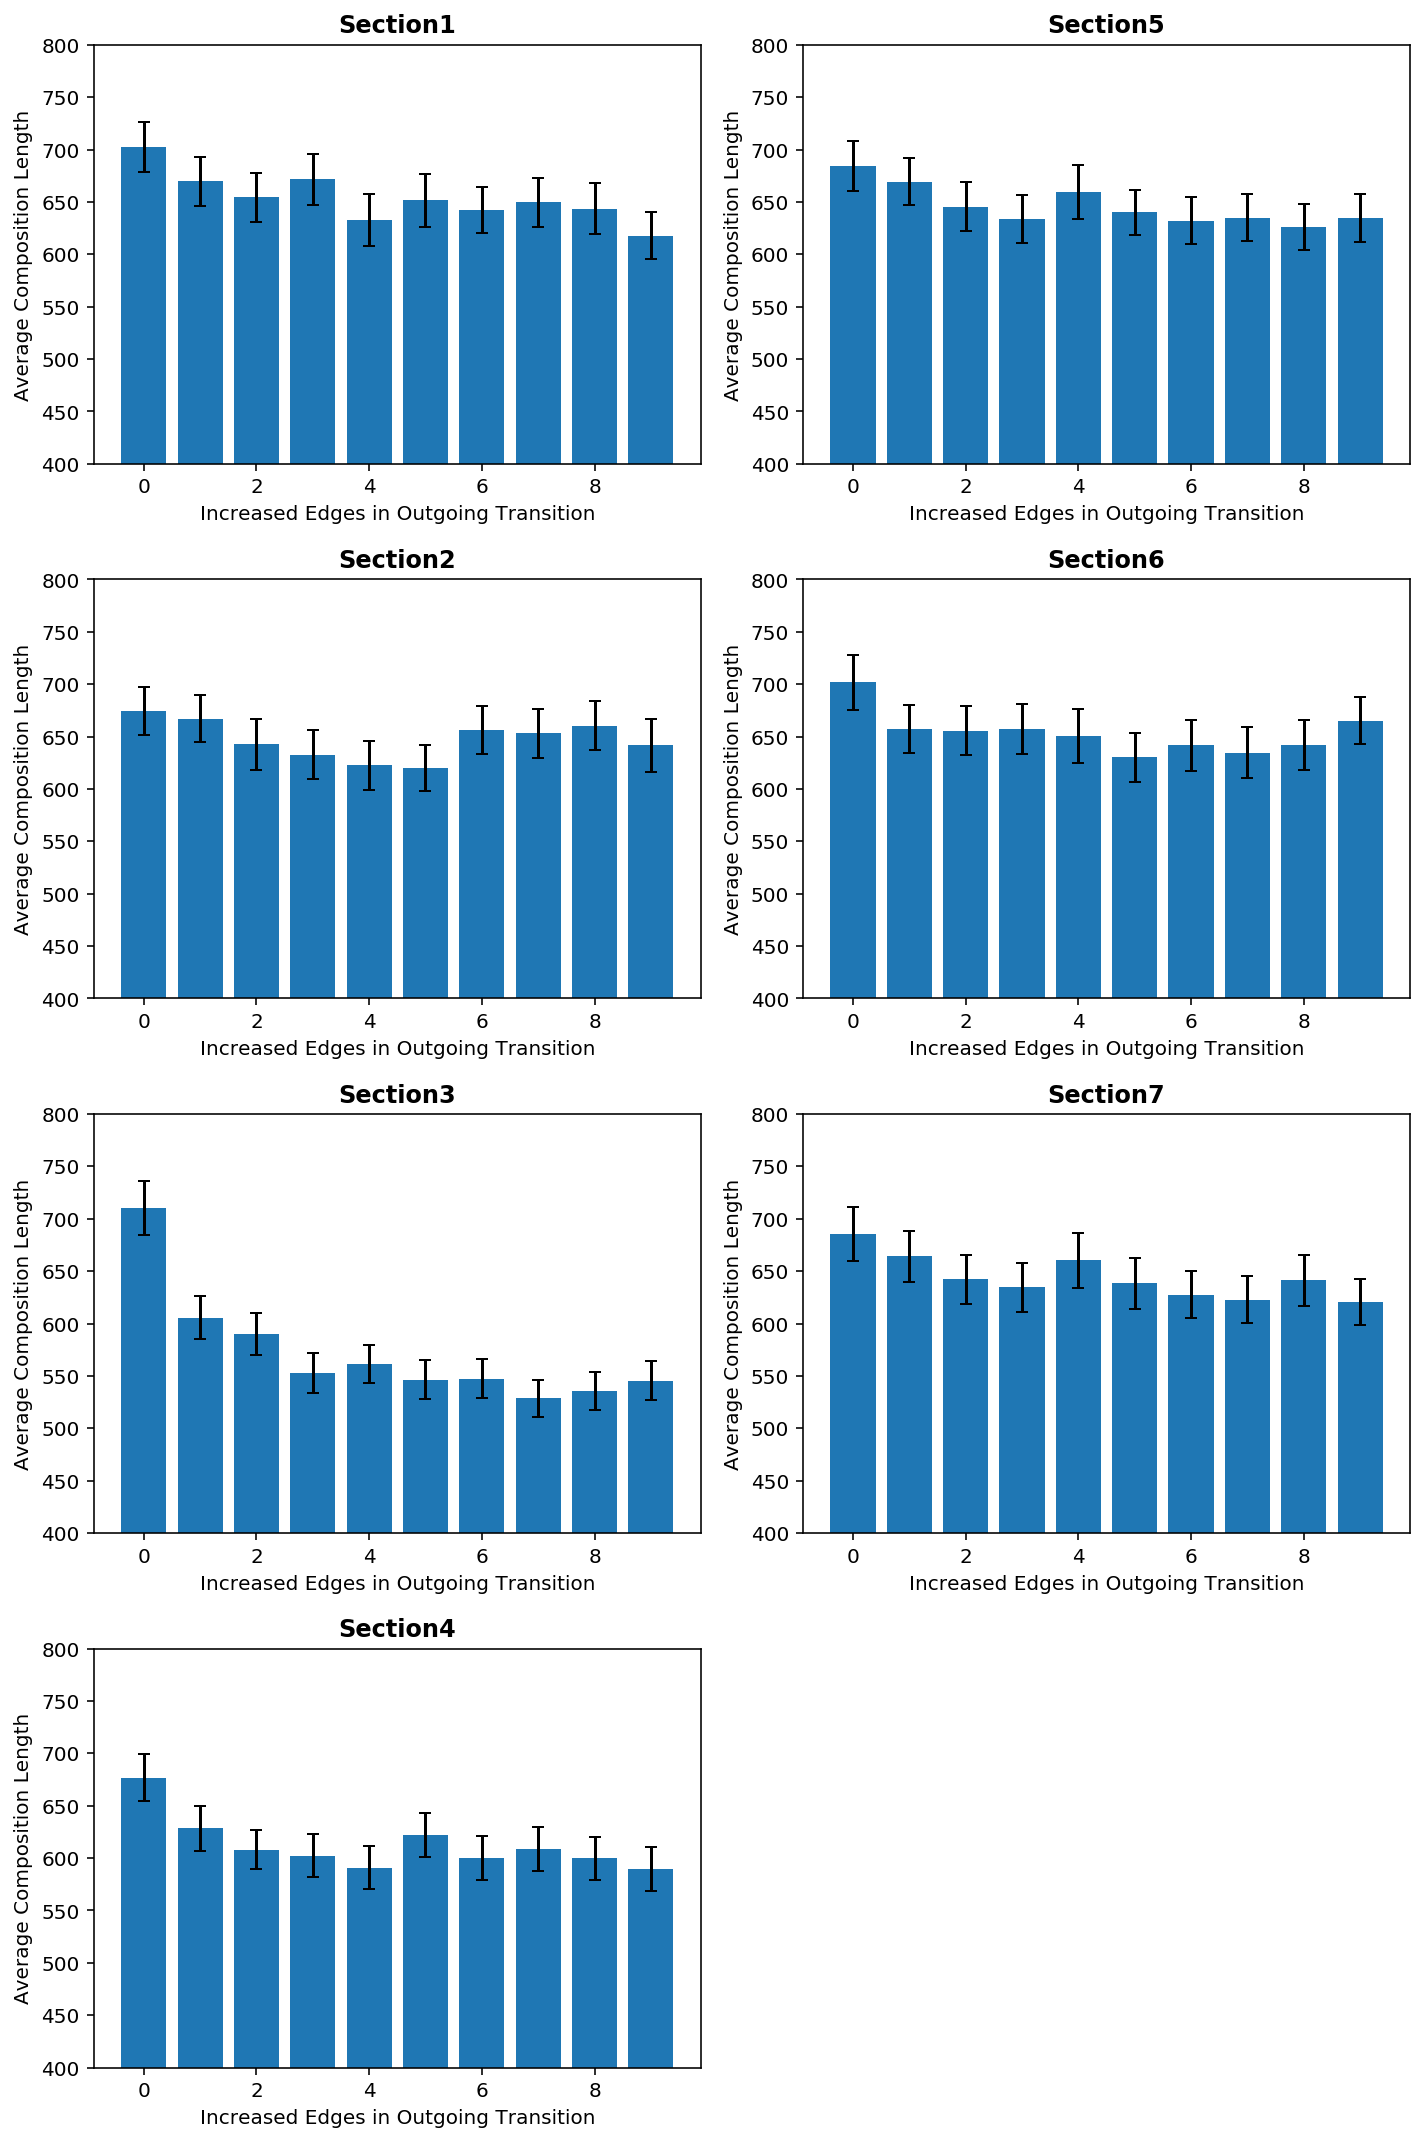

In [16]:
i=0
fig = plt.figure(figsize=(10,15) ) 
while i < len(transition_edges):
    
  
    loc = np.unravel_index(i, [4,2], 'F')
    plt.subplot2grid((4,2), loc)
    plt.title('Section'+str(i+1), fontweight='bold')
    plt.xlabel('Increased Edges in Outgoing Transition')
    plt.ylabel('Average Composition Length')
    x=np.arange(0, len(transition_vars2[0]), 1)
    #plt.plot(x, transition_vars[i], 'bo')
    plt.bar(x, transition_means2[i],  yerr = transition_vars2[i], capsize=3)
    #plt.plot(x, transition_means[i], 'go')
    plt.ylim((400,800))
    i += 1
plt.tight_layout()
plt.savefig("../figures/transition_weight_increase.pdf")
plt.show()

In [17]:
transition_edges

[('1 A4', '5 D5'),
 ('5 E4', '11 A4'),
 ('11 A4', '27 A5'),
 ('27 E4', '37 C#5'),
 ('37 E4', '49 C#5'),
 ('49 E4', '61 D5'),
 ('61 A4', '75 D5')]